# Generate results table

In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

def get_accs(exp_name, mode='sys', project_name='CGQA', name='Top1_Acc_Stream/eval_phase/test_stream', index='', test_n_way=None, model=None, frz_prefix='naive'):

    if mode in ['continual', 'forgetting']:
        if not os.path.exists(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}{index}.npy')):
            return np.array([0])
        results = np.load(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}{index}.npy'), allow_pickle=True)

    else:
        if test_n_way is not None and model is not None:
            file_name = f'results-{exp_name}-{mode}-{frz_prefix}-frz-test_n_way{test_n_way}-model{model}.npy'
        elif test_n_way:
            file_name = f'results-{exp_name}-{mode}-{frz_prefix}-frz-test_n_way{test_n_way}.npy'
        else:
            file_name = f'results-{exp_name}-{mode}-{frz_prefix}-frz.npy'
        print(file_name)
        if not os.path.exists(os.path.join('../../../avalanche-experiments', project_name, exp_name, file_name)):
            return np.array([0])

        results = np.load(os.path.join('../../../avalanche-experiments', project_name, exp_name, file_name), allow_pickle=True)

    accs = []

    for k, v in results[-1].items():
        if k.startswith(name):
            accs.append(v)

    return np.array(accs)


# Load one exp

In [18]:

# return_task_id = True
exp_name = 'MT-naive-tsk_True-lr0_0001'
postfix = ''        # '' for MT, '-2' or '-9' for others
# exps = ['naive-cls-lr0_003', 'er-cls-lr0_003', 'gem-cls-lr0_01-p32-m0_3', 'lwf-cls-lr0_005-a1-t1', 'ewc-cls-lr0_005-lambda0_1']
# exps = ['naive-tsk-lr0_008', 'er-tsk-lr0_0008', 'gem-tsk-lr0_001-p32-m0_3', 'lwf-tsk-lr0_01-a1-t1', 'ewc-tsk-lr0_005-lambda2']
# Multi-task: MT-naive-tsk_False-lr0_005; MT-naive-tsk_True-lr0_001
# ViT baselines:
#     ht-vit-naive-cls-lr0_0001; ht-vit-naive-tsk-lr0_0001;
#     ht-vit-er-cls-lr0_0001; ht-vit-er-tsk-lr0_0001;
#     ht-vit-gem-cls-lr5e-05; ht-vit-gem-tsk-lr1e-05;
#     ht-vit-lwf-cls-lr0_0001; ht-vit-lwf-tsk-lr0_0001
#     ht-vit-ewc-cls-lr0_0001; ht-vit-ewc-tsk-lr0_0001

# cobj
# 'HT-MT-3tasks-naive-tsk_True-lr0_00231', 'HT-MT-3tasks-naive-tsk_False-lr0_00123',
# 'HT-naive-tsk_True-lr0_001', 'HT-naive-tsk_False-lr0_001',
# 'HT-er-tsk_True-lr0_01', 'HT-er-tsk_False-lr0_01',
# 'HT-gem-tsk_True-lr0_001-p16-m0_3', 'HT-gem-tsk_False-lr0_001-p256-m0_00139',
# 'HT-lwf-tsk_True-lr0_001-a1-t2', 'HT-lwf-tsk_False-lr0_001-a1-t1_52',
# 'HT-ewc-tsk_True-lr0_01-lambda100', 'HT-ewc-tsk_False-lr0_00053-lambda10',

results = np.load(os.path.join('../../../avalanche-experiments', 'CGQA', exp_name, f'results-{exp_name}{postfix}.npy'), allow_pickle=True)
first_result = results[0]
last_result = results[-1]
print('Test acc:', get_accs(exp_name, mode='continual', project_name='CGQA', name='Top1_Acc_Stream/eval_phase/test_stream', index=postfix))
# 只有最后一个task的test acc，奇怪
print([k for k in last_result.keys() if k.startswith('Top1_Acc_Exp/eval_phase/test_stream')])

# forget
print('Test forgetting:', get_accs(exp_name, mode='continual', project_name='CGQA', name='StreamForgetting/eval_phase/test_stream', index=postfix))

Test acc: [0.8967]
['Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000', 'Top1_Acc_Exp/eval_phase/test_stream/Task001/Exp001', 'Top1_Acc_Exp/eval_phase/test_stream/Task002/Exp002', 'Top1_Acc_Exp/eval_phase/test_stream/Task003/Exp003', 'Top1_Acc_Exp/eval_phase/test_stream/Task004/Exp004', 'Top1_Acc_Exp/eval_phase/test_stream/Task005/Exp005', 'Top1_Acc_Exp/eval_phase/test_stream/Task006/Exp006', 'Top1_Acc_Exp/eval_phase/test_stream/Task007/Exp007', 'Top1_Acc_Exp/eval_phase/test_stream/Task008/Exp008', 'Top1_Acc_Exp/eval_phase/test_stream/Task009/Exp009']
Test forgetting: [0.]


\begin{tabular}{lrrr}
{Task} & {0} & {1} & {2} \\
{Exp} & {} & {} & {} \\
0 & 50.200000 & 0.000000 & 0.000000 \\
1 & 0.000000 & 56.100000 & 0.000000 \\
2 & 0.000000 & 0.000000 & 55.100000 \\
\end{tabular}

Task     0     1     2
Exp                   
0     50.2   0.0   0.0
1      0.0  56.1   0.0
2      0.0   0.0  55.1


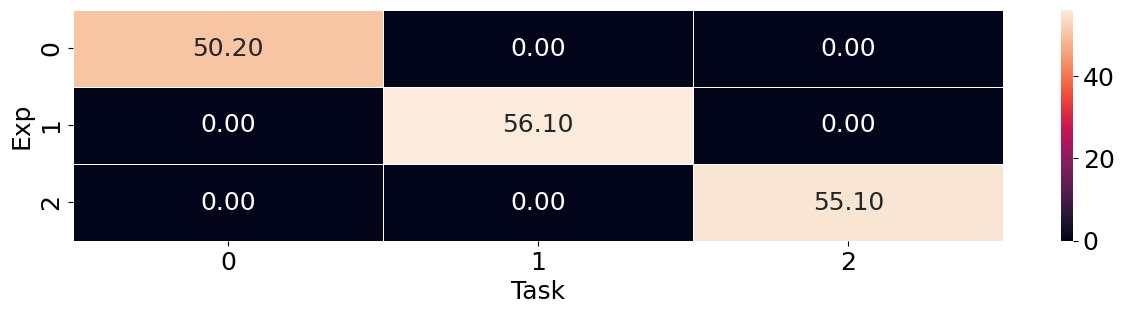

In [13]:

return_task_id = False
num_experiments = 3      # 1 for MT, 3 for others
num_tasks = 3            # all for 3
exp_name = 'HT-ewc-tsk_False-lr0_00053-lambda10'

# cobj
# 'HT-MT-3tasks-naive-tsk_True-lr0_001', 'HT-MT-3tasks-naive-tsk_False-lr0_001',
# # 'HT-MT-naive-tsk_True-lr0_00231', 'HT-MT-naive-tsk_False-lr0_00123',    # 10tasks
# 'HT-naive-tsk_True-lr0_001', 'HT-naive-tsk_False-lr0_001',
# 'HT-er-tsk_True-lr0_01', 'HT-er-tsk_False-lr0_01',
# 'HT-gem-tsk_True-lr0_001-p16-m0_3', 'HT-gem-tsk_False-lr0_001-p256-m0_00139',
# 'HT-lwf-tsk_True-lr0_001-a1-t2', 'HT-lwf-tsk_False-lr0_001-a1-t1_52',
# 'HT-ewc-tsk_True-lr0_01-lambda100', 'HT-ewc-tsk_False-lr0_00053-lambda10',

results = []
for task_id in range(num_experiments):
    postfix = f'-{task_id}' if 'MT' not in exp_name else ''
    result = np.load(os.path.join('../../../avalanche-experiments', 'COBJ', exp_name, f'results-{exp_name}{postfix}.npy'), allow_pickle=True)
    results.append(result[-1])

'''collect exps'''
collected_data = []

for exp_id, exp_results in enumerate(results):     # all ten results
    for task_id in range(num_tasks):
        if return_task_id:
            task_id_str = '%03d' % task_id    # task-il: 000 -> 009
        else:
            task_id_str = '%03d' % 0    # class-il: 000
        exp_id_str = '%03d' % task_id   # 000 -> 009
        result = exp_results[f'Top1_Acc_Exp/eval_phase/test_stream/Task{task_id_str}/Exp{exp_id_str}']
        collected_data.append(pd.DataFrame({'Method': exp_name, 'Exp': exp_id, 'Task': task_id, 'Accuracy': result*100}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# to latex

data = collected_data.pivot(index='Exp', columns='Task', values='Accuracy')
# data = data[modes]
# data = data.reindex(exps_dis)
print(data.style.to_latex())
print(data)

plt.figure(figsize=(15, 3))
# sns.set_palette('Paired')
matplotlib.rcParams.update({'font.size': 18})

# ax = sns.scatterplot(x="Weight", y="learning rate", data=collected_data, hue='Method')
# plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
# ax = sns.heatmap(collected_data.pivot("Method", "learning rate", "Accuracy"), annot=True, fmt=".2f", linewidth=.5)
ax = sns.heatmap(data, annot=True, fmt=".2f", linewidth=.5)
# ax = px.line(collected_data, x="Train size", y="Accuracy", hover_data=['Accuracy', 'Method'], color='Method')
# ax.show()

# plt.ylim([5, 6.5])

fig = ax.get_figure()
fig.savefig(os.path.join('D:', 'Downloads', 'fig.png'), dpi = 400, bbox_inches='tight')

# Generate average test table

In [11]:
'''collect exps rebuttal l2p dualprompt'''
'''collect exps'''
project_name = 'COBJ'   # 'CGQA'
# modes = ['continual', 'sys', 'pro', 'sub', 'non', 'noc']    # , 'forgetting'
modes = ['continual', 'sys', 'pro', 'non', 'noc']    # , 'forgetting'

exps = ['TaskI_codaPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1', 'TaskI_dualPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1', 'TaskI_fine-tune_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1', 'TaskI_l2p_TaskI_l2p_plus_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1', 'TaskI_naive_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1']
exps_dis = ['codaPrompt', 'dualPrompt', 'FT_Classifier', 'l2p', 'FT_backbone']

collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for mode in modes:
        print(mode)
        if mode == 'forgetting':
            accs = get_accs(exp_name, mode, project_name=project_name, index='' if 'MT' not in exp_name else '', name='StreamForgetting/eval_phase/test_stream')
            print(accs)
        else:
            accs = get_accs(exp_name, mode, project_name=project_name, index='-last', test_n_way=10, frz_prefix=exp_name.split('_')[1])
        print(accs)
        collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

TaskI_codaPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1
continual
[0.892]
sys
results-TaskI_codaPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1-sys-codaPrompt-frz-test_n_way10.npy
[0.38 0.3  0.32 0.29 0.33 0.27 0.31 0.36 0.28 0.27 0.37 0.45 0.37 0.29
 0.17 0.25 0.3  0.29 0.2  0.34 0.31 0.29 0.27 0.31 0.31 0.25 0.36 0.36
 0.27 0.21 0.26 0.35 0.34 0.4  0.21 0.37 0.36 0.4  0.31 0.17 0.41 0.24
 0.22 0.31 0.41 0.3  0.39 0.38 0.43 0.34]
pro
results-TaskI_codaPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1-pro-codaPrompt-frz-test_n_way10.npy
[0.24 0.19 0.26 0.21 0.21 0.32 0.12 0.31 0.33 0.27 0.3  0.39 0.24 0.3
 0.33 0.23 0.33 0.18 0.24 0.32 0.25 0.37 0.19 0.19 0.23 0.24 0.28 0.26
 0.29 0.23 0.22 0.17 0.22 0.15 0.19 0.2  0.23 0.21 0.21 0.18 0.19 0.29
 0.27 0.23 0.31 0.21 0.36 0.17 0.39 0.3 ]
non
results-TaskI_codaPrompt_FC-10tasks-tsk_True-lr0_001-p16-m0_3-seed1-non-codaPrompt-frz-test_n_way10.npy
[0.22 0.28 0.25 0.32 0.14 0.31 0.3  0.3  0.27 0.24 0.29 0.4  0.32 0.23
 0.14 0.26 0.32 0.

In [12]:
'''todo: cal Harmonic mean (among sys, pro, sub) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode not in ['continual', 'forgetting'] else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
    # hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])
    hm_nov = 2 * mean_dict['sys'] * mean_dict['pro'] / (mean_dict['sys'] + mean_dict['pro'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

    # 2x1*x2/(x1+x2)
    hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

    # hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    hm_all = 4 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
# data = data[['continual', 'forgetting', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
# data = data[['continual', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data[['continual', 'sys', 'pro', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{lllllllll}
{Phase} & {continual} & {sys} & {pro} & {Hn} & {non} & {noc} & {Hr} & {Ha} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} \\
codaPrompt & 89.20 & 31.36 $\pm$ 1.83 & 25.10 $\pm$ 1.76 & 27.88 & 27.00 $\pm$ 1.79 & 51.26 $\pm$ 2.14 & 35.37 & 31.18 \\
dualPrompt & 88.93 & 31.44 $\pm$ 2.22 & 25.38 $\pm$ 1.88 & 28.09 & 27.32 $\pm$ 2.10 & 51.58 $\pm$ 2.00 & 35.72 & 31.45 \\
FT_Classifier & 89.07 & 30.50 $\pm$ 2.37 & 24.30 $\pm$ 1.99 & 27.05 & 27.82 $\pm$ 1.64 & 52.76 $\pm$ 1.77 & 36.43 & 31.05 \\
l2p & 89.47 & 30.48 $\pm$ 2.57 & 25.26 $\pm$ 2.05 & 27.63 & 27.32 $\pm$ 2.06 & 51.20 $\pm$ 1.86 & 35.63 & 31.12 \\
FT_backbone & 56.50 & 22.22 $\pm$ 1.15 & 20.62 $\pm$ 1.10 & 21.39 & 22.32 $\pm$ 1.28 & 30.06 $\pm$ 1.47 & 25.62 & 23.31 \\
\end{tabular}



Phase,continual,sys,pro,Hn,non,noc,Hr,Ha
Method,,,,,,,,
codaPrompt,89.20,31.36 +- 1.83,25.10 +- 1.76,27.88,27.00 +- 1.79,51.26 +- 2.14,35.37,31.18
dualPrompt,88.93,31.44 +- 2.22,25.38 +- 1.88,28.09,27.32 +- 2.10,51.58 +- 2.00,35.72,31.45
FT_Classifier,89.07,30.50 +- 2.37,24.30 +- 1.99,27.05,27.82 +- 1.64,52.76 +- 1.77,36.43,31.05
l2p,89.47,30.48 +- 2.57,25.26 +- 2.05,27.63,27.32 +- 2.06,51.20 +- 1.86,35.63,31.12
FT_backbone,56.50,22.22 +- 1.15,20.62 +- 1.10,21.39,22.32 +- 1.28,30.06 +- 1.47,25.62,23.31


In [34]:
'''collect exps rebuttal per-task Hn'''
project_name = 'COBJ'
models = [0, 1, 2]
modes = ['continual', 'sys', 'pro', 'non', 'noc']

'''rebuttal'''
# exps = [
#     'rebuttal-naive-tsk_False', 'rebuttal-er-tsk_False', 'rebuttal-gem-tsk_False', 'rebuttal-lwf-tsk_False', 'rebuttal-ewc-tsk_False',
#     'rebuttal-naive-tsk_True', 'rebuttal-er-tsk_True', 'rebuttal-gem-tsk_True', 'rebuttal-lwf-tsk_True', 'rebuttal-ewc-tsk_True']
exps = [
    'HT-naive-tsk_True-lr0_001', 'HT-naive-tsk_False-lr0_001',
        'HT-er-tsk_True-lr0_01', 'HT-er-tsk_False-lr0_01',
        'HT-gem-tsk_True-lr0_001-p16-m0_3', 'HT-gem-tsk_False-lr0_001-p256-m0_00139',
        'HT-lwf-tsk_True-lr0_001-a1-t2', 'HT-lwf-tsk_False-lr0_001-a1-t1_52',
        'HT-ewc-tsk_True-lr0_01-lambda100', 'HT-ewc-tsk_False-lr0_00053-lambda10',
]

exps_dis = ['Finetune*', 'Finetune', 'ER*', 'ER', 'GEM*', 'GEM', 'LwF*', 'LwF', 'EWC*', 'EWC']

collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for model in models:
        print(model)
        for mode in modes:
            accs = get_accs(exp_name, mode, project_name=project_name, test_n_way=10, model=model, index='-2')
            print(accs)
            collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'model': model, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

HT-naive-tsk_True-lr0_001
0
[0.39433333]
[0.42 0.35 0.48 0.4  0.45 0.47 0.39 0.43 0.35 0.4  0.41 0.34 0.42 0.39
 0.39 0.38 0.38 0.36 0.38 0.45 0.39 0.34 0.54 0.38 0.39 0.4  0.47 0.43
 0.48 0.41 0.35 0.36 0.49 0.34 0.39 0.38 0.43 0.65 0.31 0.37 0.35 0.33
 0.44 0.34 0.45 0.23 0.44 0.5  0.38 0.43]
[0.44 0.32 0.34 0.32 0.3  0.37 0.28 0.32 0.33 0.38 0.23 0.34 0.46 0.23
 0.33 0.31 0.38 0.39 0.39 0.34 0.38 0.35 0.39 0.23 0.35 0.29 0.43 0.41
 0.38 0.31 0.34 0.35 0.47 0.37 0.4  0.3  0.3  0.47 0.35 0.25 0.39 0.31
 0.31 0.35 0.29 0.4  0.41 0.29 0.36 0.36]
[0.73 0.6  0.46 0.46 0.64 0.4  0.46 0.38 0.59 0.52 0.55 0.65 0.49 0.48
 0.48 0.43 0.39 0.44 0.51 0.46 0.65 0.33 0.37 0.61 0.52 0.36 0.45 0.33
 0.6  0.49 0.44 0.53 0.39 0.37 0.46 0.42 0.35 0.45 0.51 0.58 0.54 0.45
 0.52 0.48 0.45 0.4  0.38 0.44 0.5  0.6 ]
[0.25 0.3  0.39 0.25 0.31 0.39 0.39 0.35 0.39 0.25 0.21 0.39 0.3  0.33
 0.42 0.34 0.39 0.4  0.35 0.3  0.28 0.38 0.4  0.35 0.32 0.3  0.45 0.4
 0.29 0.5  0.29 0.3  0.35 0.3  0.35 0.26 0.22 0.31 0.

In [35]:
'''todo: cal Harmonic mean (among sys, pro, sub) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for model in models:
        for mode in modes:
            acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode) & (collected_data['model'] == model)]['Accuracy']
            mean = acc_list.mean()
            mean_dict[mode[:3]] = mean
            ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
            acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode not in ['continual', 'forgetting'] else f'{mean*100:.2f}'
            Phase = f'{mode[:3]}_{model}'
            data.append(pd.DataFrame({'Method': exp, 'Phase': Phase, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

        # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
        hm_nov = 2 * mean_dict['sys'] * mean_dict['pro'] / (mean_dict['sys'] + mean_dict['pro'])
        data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn_{model}', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

        # 2x1*x2/(x1+x2)
        hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
        data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr_{model}', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

        hm_all = 4 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
        data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha_{model}', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
print(data)

# to latex
data = data.pivot(index='Method', values='str', columns='Phase')
# data = data[['continual', 'forgetting', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
# sele = []
# for model in models:
#     sele.extend([f'con_{model}', f'sys_{model}', f'pro_{model}', f'Hn_{model}', f'non_{model}',  f'noc_{model}', f'Hr_{model}', f'Ha_{model}'])
sele = [f'Hn_0', f'Hn_1', f'Hn_2']
data = data[sele]
# data = data[[f'Hn_{model}' for model in models]]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

        Method  Phase      mean      ci95            str
0    Finetune*  con_0  0.394333       NaN          39.43
1    Finetune*  sys_0  0.404600  0.018165  40.46 +- 1.82
2    Finetune*  pro_0  0.347800  0.016088  34.78 +- 1.61
3    Finetune*  non_0  0.481800  0.025421  48.18 +- 2.54
4    Finetune*  noc_0  0.335800  0.016347  33.58 +- 1.63
..         ...    ...       ...       ...            ...
235        EWC  non_2  0.479600  0.019536  47.96 +- 1.95
236        EWC  noc_2  0.349200  0.015406  34.92 +- 1.54
237        EWC   Hn_2       NaN       NaN          38.68
238        EWC   Hr_2       NaN       NaN          40.41
239        EWC   Ha_2       NaN       NaN          39.53

[240 rows x 5 columns]
\begin{tabular}{llll}
{Phase} & {Hn_0} & {Hn_1} & {Hn_2} \\
{Method} & {} & {} & {} \\
Finetune* & 37.41 & 37.07 & 40.93 \\
Finetune & 37.57 & 38.32 & 37.82 \\
ER* & 31.11 & 37.30 & 38.66 \\
ER & 30.27 & 33.33 & 36.99 \\
GEM* & 37.45 & 35.60 & 40.93 \\
GEM & 38.05 & 37.60 & 37.36 \\
LwF* & 3

Phase,Hn_0,Hn_1,Hn_2
Method,,,
Finetune*,37.41,37.07,40.93
Finetune,37.57,38.32,37.82
ER*,31.11,37.30,38.66
ER,30.27,33.33,36.99
GEM*,37.45,35.60,40.93
GEM,38.05,37.60,37.36
LwF*,37.84,44.01,44.75
LwF,38.13,43.34,45.19
EWC*,30.76,34.18,36.20


In [17]:
'''collect exps'''
project_name = 'CGQA'
modes = ['continual', 'sys', 'pro', 'sub', 'non', 'noc']    # , 'forgetting'

'''resnet18'''
exps = ['naive-cls-lr0_003', 'er-cls-lr0_003', 'gem-cls-lr0_01-p32-m0_3', 'lwf-cls-lr0_005-a1-t1', 'ewc-cls-lr0_005-lambda0_1', 'naive-tsk-lr0_008', 'er-tsk-lr0_0008', 'gem-tsk-lr0_001-p32-m0_3', 'lwf-tsk-lr0_01-a1-t1', 'ewc-tsk-lr0_005-lambda2']
exps_dis = ['Finetune', 'ER', 'GEM', 'LwF', 'EWC', 'Finetune*', 'ER*', 'GEM*', 'LwF*', 'EWC*']

'''vit'''
# exps = ['HT-MT-vit-naive-tsk_False-lr0_0001', 'ht-vit-naive-cls-lr0_0001', 'ht-vit-er-cls-lr0_0001', 'ht-vit-gem-cls-lr5e-05', 'ht-vit-lwf-cls-lr0_0001', 'ht-vit-ewc-cls-lr0_0001',
#         'HT-MT-vit-naive-tsk_True-lr0_0001', 'ht-vit-naive-tsk-lr0_0001', 'ht-vit-er-tsk-lr0_0001', 'ht-vit-gem-tsk-lr1e-05', 'ht-vit-lwf-tsk-lr0_0001', 'ht-vit-ewc-tsk-lr0_0001']
# exps_dis = ['MT', 'Finetune', 'ER', 'GEM', 'LwF', 'EWC',
#             'MT*', 'Finetune*', 'ER*', 'GEM*', 'LwF*', 'EWC*']

'''concept'''
# exps = [
#         f'concept-concept-tsk_True-lr0_01-w1',
#         f'concept-concept-tsk_False-lr0_001-w0_5',
#     ]
# exps_dis = ['Task-IL', 'Class-IL']

'''Multi Task'''
# exps = [
#     f'MT-naive-tsk_{return_task_id}-lr{learning_rate}'
#     for return_task_id in [True, False]
#     for learning_rate in ['0_0001', '0_0005', '0_001', '0_005', '0_01', '0_05', '0_1']
#     ]
# exps_dis = [
#     f"{'Task' if return_task_id else 'Class'} lr{learning_rate}"
#     for return_task_id in [True, False]
#     for learning_rate in ['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1']
# ]

'''Random model'''
# exps = [
#     'random-naive-tsk_False'
#     ]
# exps_dis = [
#     'random'
# ]

'''agem'''
# exps = [
#     *[f'HT-agem-tsk_{return_task_id}-lr{lr}'
#       for return_task_id in [False, True]
#       for lr in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(-4, -1, num=8), decimals=4).tolist()
#       ]],
#     ]
# exps_dis = [
#     *[f"agem {'Task' if return_task_id else 'Class'} lr {lr}"
#       for return_task_id in [False, True] for lr in np.around(np.logspace(-4, -1, num=8), decimals=4).tolist()],
# ]

collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for mode in modes:
        print(mode)
        if mode == 'forgetting':
            accs = get_accs(exp_name, mode, project_name=project_name, index='' if 'MT' not in exp_name else '', name='StreamForgetting/eval_phase/test_stream')
            print(accs)
        else:
            accs = get_accs(exp_name, mode, project_name=project_name, index='' if 'MT' not in exp_name else '', test_n_way=10 if 'MT' in exp_name else None)
        print(accs)
        collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

naive-cls-lr0_003
continual
[0.0838]
sys
[0.65 0.62 0.57 0.5  0.68 0.65 0.73 0.71 0.58 0.66 0.69 0.77 0.59 0.61
 0.58 0.68 0.64 0.59 0.51 0.68 0.68 0.5  0.77 0.75 0.75 0.65 0.54 0.7
 0.72 0.68 0.67 0.63 0.7  0.68 0.62 0.65 0.69 0.53 0.73 0.62 0.53 0.64
 0.56 0.72 0.46 0.64 0.67 0.56 0.68 0.64 0.65 0.58 0.8  0.77 0.53 0.6
 0.66 0.69 0.71 0.75 0.63 0.57 0.57 0.66 0.7  0.69 0.55 0.6  0.65 0.59
 0.64 0.62 0.7  0.61 0.7  0.71 0.5  0.62 0.82 0.72 0.69 0.54 0.56 0.6
 0.58 0.48 0.67 0.54 0.7  0.69 0.69 0.7  0.62 0.59 0.56 0.61 0.67 0.7
 0.74 0.61 0.73 0.7  0.56 0.64 0.63 0.54 0.62 0.68 0.67 0.61 0.66 0.61
 0.64 0.51 0.66 0.65 0.62 0.6  0.65 0.62 0.6  0.55 0.57 0.73 0.71 0.73
 0.71 0.65 0.57 0.64 0.68 0.63 0.6  0.68 0.68 0.66 0.76 0.55 0.58 0.61
 0.73 0.7  0.61 0.65 0.65 0.79 0.61 0.75 0.69 0.59 0.63 0.67 0.62 0.62
 0.72 0.66 0.77 0.53 0.67 0.68 0.62 0.78 0.75 0.63 0.61 0.62 0.66 0.69
 0.61 0.6  0.67 0.61 0.74 0.65 0.61 0.58 0.65 0.74 0.52 0.55 0.61 0.75
 0.68 0.53 0.65 0.7  0.7  0.68 0.65 0.56

In [3]:
'''cal mean and ci95, then formulate table str-cell and to latex.'''
# exp = 'Finetune'
# mode = 'continual'
# acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
data = []
for exp in exps_dis:
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))
data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', columns='Phase', values='str')
data = data[modes]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{llllll}
{Phase} & {continual} & {sys} & {pro} & {non} & {noc} \\
{Method} & {} & {} & {} & {} & {} \\
Task lr1e-05 & 0.00 & 71.13 $\pm$ 1.60 & 72.87 $\pm$ 1.61 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Task lr1e-4 & 0.00 & 71.27 $\pm$ 1.66 & 74.55 $\pm$ 1.64 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Task lr1e-3 & 0.00 & 70.87 $\pm$ 1.71 & 74.08 $\pm$ 1.75 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Task lr1e-2 & 0.00 & 66.75 $\pm$ 1.54 & 70.23 $\pm$ 1.71 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Class lr1e-05 & 0.00 & 73.20 $\pm$ 1.67 & 75.92 $\pm$ 1.63 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Class lr1e-4 & 0.00 & 76.93 $\pm$ 1.49 & 79.40 $\pm$ 1.68 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Class lr1e-3 & 0.00 & 81.78 $\pm$ 1.45 & 84.62 $\pm$ 1.40 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Class lr1e-2 & 0.00 & 77.60 $\pm$ 1.56 & 81.28 $\pm$ 1.57 & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
\end{tabular}



Phase,continual,sys,pro,non,noc
Method,,,,,
Task lr1e-05,0.00,71.13 +- 1.60,72.87 +- 1.61,0.00 +- nan,0.00 +- nan
Task lr1e-4,0.00,71.27 +- 1.66,74.55 +- 1.64,0.00 +- nan,0.00 +- nan
Task lr1e-3,0.00,70.87 +- 1.71,74.08 +- 1.75,0.00 +- nan,0.00 +- nan
Task lr1e-2,0.00,66.75 +- 1.54,70.23 +- 1.71,0.00 +- nan,0.00 +- nan
Class lr1e-05,0.00,73.20 +- 1.67,75.92 +- 1.63,0.00 +- nan,0.00 +- nan
Class lr1e-4,0.00,76.93 +- 1.49,79.40 +- 1.68,0.00 +- nan,0.00 +- nan
Class lr1e-3,0.00,81.78 +- 1.45,84.62 +- 1.40,0.00 +- nan,0.00 +- nan
Class lr1e-2,0.00,77.60 +- 1.56,81.28 +- 1.57,0.00 +- nan,0.00 +- nan


In [22]:
'''cal mean and ci95 and relative score, then formulate table str-cell and to latex.'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    for mode, mean in mean_dict.items():
        score = (mean - mean_dict['non']) / mean_dict['non']
        data.append(pd.DataFrame({'Method': exp, 'Phase': f'{mode}_score', 'str': f'{score*100:+.2f}'}, index=[0]))

    # todo: try Harmonic mean

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
data = data[['continual', 'continual_score', 'sys', 'sys_score', 'pro', 'pro_score', 'sub', 'sub_score', 'non', 'non_score',  'noc', 'noc_score']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data.head()

C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


\begin{tabular}{lllllllllllll}
{Phase} & {continual} & {continual_score} & {sys} & {sys_score} & {pro} & {pro_score} & {sub} & {sub_score} & {non} & {non_score} & {noc} & {noc_score} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
Task lr0.0001 & 89.67 & +5.84 & 79.36 $\pm$ 0.76 & -6.33 & 79.16 $\pm$ 0.79 & -6.56 & 64.07 $\pm$ 0.79 & -24.38 & 84.72 $\pm$ 0.63 & +0.00 & 37.38 $\pm$ 0.96 & -55.88 \\
Task lr0.0005 & 0.00 & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan \\
Task lr0.001 & 92.17 & +6.63 & 82.16 $\pm$ 0.68 & -4.95 & 84.22 $\pm$ 0.60 & -2.56 & 71.82 $\pm$ 0.75 & -16.91 & 86.44 $\pm$ 0.69 & +0.00 & 44.07 $\pm$ 0.95 & -49.01 \\
Task lr0.005 & 91.08 & +12.05 & 76.28 $\pm$ 0.84 & -6.15 & 77.07 $\pm$ 0.93 & -5.18 & 65.41 $\pm$ 0.85 & -19.53 & 81.28 $\pm$ 0.75 & +0.00 & 39.72 $\pm$ 0.95 & -51.14 \\
Task lr0.01 & 89.14 & +18.88 & 68.97 $\pm$ 1.12 & -8.02 & 66.65 $\pm$ 1.27 & -11.1

Phase,continual,continual_score,sys,sys_score,pro,pro_score,sub,sub_score,non,non_score,noc,noc_score
Method,,,,,,,,,,,,
Task lr0.0001,89.67,+5.84,79.36 +- 0.76,-6.33,79.16 +- 0.79,-6.56,64.07 +- 0.79,-24.38,84.72 +- 0.63,+0.00,37.38 +- 0.96,-55.88
Task lr0.0005,0.00,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan
Task lr0.001,92.17,+6.63,82.16 +- 0.68,-4.95,84.22 +- 0.60,-2.56,71.82 +- 0.75,-16.91,86.44 +- 0.69,+0.00,44.07 +- 0.95,-49.01
Task lr0.005,91.08,+12.05,76.28 +- 0.84,-6.15,77.07 +- 0.93,-5.18,65.41 +- 0.85,-19.53,81.28 +- 0.75,+0.00,39.72 +- 0.95,-51.14
Task lr0.01,89.14,+18.88,68.97 +- 1.12,-8.02,66.65 +- 1.27,-11.11,58.87 +- 1.10,-21.49,74.98 +- 0.88,+0.00,34.59 +- 1.20,-53.87


In [14]:
'''todo: cal Harmonic mean (among sys, pro, sub) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode not in ['continual', 'forgetting'] else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
    hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

    # 2x1*x2/(x1+x2)
    hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

    hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
# data = data[['continual', 'forgetting', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data[['continual', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{llllllllll}
{Phase} & {continual} & {sys} & {pro} & {sub} & {Hn} & {non} & {noc} & {Hr} & {Ha} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
Finetune & 8.38 & 64.73 $\pm$ 0.78 & 65.43 $\pm$ 0.73 & 61.26 $\pm$ 0.67 & 63.75 & 68.54 $\pm$ 0.80 & 40.32 $\pm$ 0.72 & 50.77 & 57.84 \\
ER & 19.78 & 71.38 $\pm$ 0.75 & 70.11 $\pm$ 0.64 & 64.32 $\pm$ 0.69 & 68.46 & 77.27 $\pm$ 0.67 & 40.98 $\pm$ 0.72 & 53.56 & 61.60 \\
GEM & 8.56 & 66.56 $\pm$ 0.77 & 73.47 $\pm$ 0.61 & 62.80 $\pm$ 0.71 & 67.33 & 72.65 $\pm$ 0.73 & 41.64 $\pm$ 0.72 & 52.94 & 60.72 \\
LwF & 9.11 & 71.22 $\pm$ 0.74 & 73.28 $\pm$ 0.61 & 68.74 $\pm$ 0.66 & 71.03 & 76.56 $\pm$ 0.66 & 48.69 $\pm$ 0.77 & 59.52 & 65.93 \\
EWC & 8.22 & 64.99 $\pm$ 0.78 & 73.47 $\pm$ 0.64 & 63.25 $\pm$ 0.66 & 66.95 & 69.03 $\pm$ 0.74 & 41.38 $\pm$ 0.71 & 51.75 & 59.91 \\
Finetune* & 72.46 & 70.32 $\pm$ 0.73 & 72.62 $\pm$ 0.63 & 66.33 $\pm$ 0.69 & 69.66 & 75.32 $\pm$ 0.70 & 43.26 $\pm$ 0.73 & 54.95 & 62.92 \\
ER* & 76.05 & 71.37

Phase,continual,sys,pro,sub,Hn,non,noc,Hr,Ha
Method,,,,,,,,,
Finetune,8.38,64.73 +- 0.78,65.43 +- 0.73,61.26 +- 0.67,63.75,68.54 +- 0.80,40.32 +- 0.72,50.77,57.84
ER,19.78,71.38 +- 0.75,70.11 +- 0.64,64.32 +- 0.69,68.46,77.27 +- 0.67,40.98 +- 0.72,53.56,61.60
GEM,8.56,66.56 +- 0.77,73.47 +- 0.61,62.80 +- 0.71,67.33,72.65 +- 0.73,41.64 +- 0.72,52.94,60.72
LwF,9.11,71.22 +- 0.74,73.28 +- 0.61,68.74 +- 0.66,71.03,76.56 +- 0.66,48.69 +- 0.77,59.52,65.93
EWC,8.22,64.99 +- 0.78,73.47 +- 0.64,63.25 +- 0.66,66.95,69.03 +- 0.74,41.38 +- 0.71,51.75,59.91
Finetune*,72.46,70.32 +- 0.73,72.62 +- 0.63,66.33 +- 0.69,69.66,75.32 +- 0.70,43.26 +- 0.73,54.95,62.92
ER*,76.05,71.37 +- 0.70,72.67 +- 0.69,66.80 +- 0.63,70.19,76.28 +- 0.66,45.61 +- 0.77,57.09,64.29
GEM*,21.60,69.44 +- 0.75,73.14 +- 0.67,66.61 +- 0.66,69.63,73.31 +- 0.71,45.97 +- 0.74,56.51,63.71
LwF*,73.19,69.61 +- 0.77,74.22 +- 0.63,65.00 +- 0.65,69.40,75.25 +- 0.69,42.52 +- 0.72,54.34,62.48


## COBJ

In [4]:
'''collect exps'''
project_name = 'COBJ'
modes = ['continual', 'sys', 'pro', 'non', 'noc']
index = '-last'        # -last

'''resnet18'''
# exps = [
#         # # 3 tasks 10-way
#         # 'HT-MT-3tasks-naive-tsk_True-lr0_001', 'HT-MT-3tasks-naive-tsk_False-lr0_001',
#         # 'HT-naive-tsk_True-lr0_001', 'HT-naive-tsk_False-lr0_001',
#         # 'HT-er-tsk_True-lr0_01', 'HT-er-tsk_False-lr0_01',
#         # 'HT-gem-tsk_True-lr0_001-p16-m0_3', 'HT-gem-tsk_False-lr0_001-p256-m0_00139',
#         # 'HT-lwf-tsk_True-lr0_001-a1-t2', 'HT-lwf-tsk_False-lr0_001-a1-t1_52',
#         # 'HT-ewc-tsk_True-lr0_01-lambda100', 'HT-ewc-tsk_False-lr0_00053-lambda10',
#
#         # # 10 tasks 3-way
#         # 'HT-MT-naive-tsk_True-lr0_00231', 'HT-MT-naive-tsk_False-lr0_00123',
#         # 'HT-10tasks-naive-tsk_True-lr1e-05', 'HT-10tasks-naive-tsk_False-lr0_001',
#         # 'HT-10tasks-er-tsk_True-lr0_001', 'HT-10tasks-er-tsk_False-lr0_001',
#         # 'HT-10tasks-gem-tsk_True-lr0_001-p16-m0_3', 'HT-10tasks-gem-tsk_False-lr0_001-p256-m0_00139',
#         # 'HT-10tasks-lwf-tsk_True-lr1e-05-a1-t2', 'HT-10tasks-lwf-tsk_False-lr0_001-a1-t2',
#         # 'HT-10tasks-ewc-tsk_True-lr1e-05-lambda100', 'HT-10tasks-ewc-tsk_False-lr0_01-lambda10',
#
#         # 5 tasks 6-way
#         'HT-MT-5tasks-naive-tsk_True-lr0_001', 'HT-MT-5tasks-naive-tsk_False-lr0_001',
#         'HT-5tasks-naive-tsk_True-lr0_01', 'HT-5tasks-naive-tsk_False-lr0_001',
#         'HT-5tasks-er-tsk_True-lr0_001', 'HT-5tasks-er-tsk_False-lr0_001',
#         'HT-5tasks-gem-tsk_True-lr0_01-p16-m0_3', 'HT-5tasks-gem-tsk_False-lr0_01-p256-m0_00139',
#         'HT-5tasks-lwf-tsk_True-lr0_001-a1-t2', 'HT-5tasks-lwf-tsk_False-lr0_001-a1-t2',
#         'HT-5tasks-ewc-tsk_True-lr0_001-lambda100', 'HT-5tasks-ewc-tsk_False-lr0_001-lambda10',
# ]
# exps_dis = ['MultiTask*', 'MultiTask', 'Finetune*', 'Finetune', 'ER*', 'ER', 'GEM*', 'GEM', 'LwF*', 'LwF', 'EWC*', 'EWC']

'''vit'''
exps = [
        # 3 tasks 10-way
        'HT-vit-3tasks-MT-naive-tsk_True-lr5e-05', 'HT-vit-3tasks-MT-naive-tsk_False-lr5e-05', # (sk, sk)
        'HT-vit-3tasks-naive-tsk_True-lr5e-05', 'HT-vit-3tasks-naive-tsk_False-lr5e-05',    # (gc, sty)
        'HT-vit-3tasks-er-tsk_True-lr5e-05', 'HT-vit-3tasks-er-tsk_False-lr5e-05',
        'HT-vit-3tasks-gem-tsk_True-lr5e-05-p32-m0_3', 'HT-vit-3tasks-gem-tsk_False-lr0_0001-p32-m0_3',  # (gc, sty)
        'HT-vit-3tasks-lwf-tsk_True-lr5e-05-a1-t1', 'HT-vit-3tasks-lwf-tsk_False-lr0_0001-a1-t1',
        'HT-vit-3tasks-ewc-tsk_True-lr0_0001-lambda2', 'HT-vit-3tasks-ewc-tsk_False-lr0_0001-lambda2',   # (gc, sty)
]
exps_dis = ['MultiTask*', 'MultiTask', 'Finetune*', 'Finetune', 'ER*', 'ER', 'GEM*', 'GEM', 'LwF*', 'LwF', 'EWC*', 'EWC']


'''Multi Task'''
# exps = [
#     f'HT-MT-naive-tsk_{return_task_id}-lr{learning_rate}'
#     for return_task_id in [True, False]
#     for learning_rate in [
#         (lambda x: str(x).replace('.', '_')) (x)
#         for x in np.around(np.logspace(-4, -1, num=12), decimals=5).tolist()]
#     ]
# exps_dis = [
#     f"{'Task' if return_task_id else 'Class'} lr{learning_rate}"
#     for return_task_id in [True, False]
#     for learning_rate in np.around(np.logspace(-4, -1, num=12), decimals=5).tolist()
# ]

collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for mode in modes:
        print(mode)
        accs = get_accs(exp_name, mode, project_name=project_name, index=index if 'MT' not in exp_name else '',
                        test_n_way=10)
        # print(accs)
        collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

HT-vit-3tasks-MT-naive-tsk_True-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-MT-naive-tsk_False-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-naive-tsk_True-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-naive-tsk_False-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-er-tsk_True-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-er-tsk_False-lr5e-05
continual
sys
pro
non
noc
HT-vit-3tasks-gem-tsk_True-lr5e-05-p32-m0_3
continual
sys
pro
non
noc
HT-vit-3tasks-gem-tsk_False-lr0_0001-p32-m0_3
continual
sys
pro
non
noc
HT-vit-3tasks-lwf-tsk_True-lr5e-05-a1-t1
continual
sys
pro
non
noc
HT-vit-3tasks-lwf-tsk_False-lr0_0001-a1-t1
continual
sys
pro
non
noc
HT-vit-3tasks-ewc-tsk_True-lr0_0001-lambda2
continual
sys
pro
non
noc
HT-vit-3tasks-ewc-tsk_False-lr0_0001-lambda2
continual
sys
pro
non
noc


In [5]:
'''For COBJ, no sub cal Harmonic mean (among sys, pro) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
    # hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])
    hm_nov = 2 * mean_dict['sys'] * mean_dict['pro'] / (mean_dict['sys'] + mean_dict['pro'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

    # 2x1*x2/(x1+x2)
    hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

    # hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    hm_all = 4 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
# data = data[['continual', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data[['continual', 'sys', 'pro', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{lllllllll}
{Phase} & {continual} & {sys} & {pro} & {Hn} & {non} & {noc} & {Hr} & {Ha} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} \\
MultiTask* & 46.40 & 41.78 $\pm$ 0.67 & 35.95 $\pm$ 0.72 & 38.64 & 53.19 $\pm$ 0.84 & 35.23 $\pm$ 0.68 & 42.39 & 40.43 \\
MultiTask & 28.23 & 41.90 $\pm$ 0.63 & 36.58 $\pm$ 0.72 & 39.06 & 49.88 $\pm$ 0.82 & 35.69 $\pm$ 0.69 & 41.61 & 40.29 \\
Finetune* & 41.97 & 37.53 $\pm$ 0.66 & 33.49 $\pm$ 0.71 & 35.39 & 41.45 $\pm$ 0.77 & 34.94 $\pm$ 0.67 & 37.92 & 36.61 \\
Finetune & 13.93 & 37.26 $\pm$ 0.59 & 33.08 $\pm$ 0.71 & 35.05 & 41.76 $\pm$ 0.74 & 33.63 $\pm$ 0.67 & 37.25 & 36.12 \\
ER* & 41.10 & 38.23 $\pm$ 0.64 & 33.48 $\pm$ 0.69 & 35.70 & 44.95 $\pm$ 0.78 & 34.46 $\pm$ 0.63 & 39.01 & 37.28 \\
ER & 18.10 & 35.03 $\pm$ 0.63 & 30.76 $\pm$ 0.66 & 32.75 & 43.62 $\pm$ 0.78 & 33.25 $\pm$ 0.68 & 37.73 & 35.07 \\
GEM* & 26.70 & 36.36 $\pm$ 0.62 & 33.00 $\pm$ 0.71 & 34.60 & 39.34 $\pm$ 0.69 & 32.18 $\pm$ 0.61 & 35.40 & 35.00 \\
GEM & 13.43 & 

Phase,continual,sys,pro,Hn,non,noc,Hr,Ha
Method,,,,,,,,
MultiTask*,46.40,41.78 +- 0.67,35.95 +- 0.72,38.64,53.19 +- 0.84,35.23 +- 0.68,42.39,40.43
MultiTask,28.23,41.90 +- 0.63,36.58 +- 0.72,39.06,49.88 +- 0.82,35.69 +- 0.69,41.61,40.29
Finetune*,41.97,37.53 +- 0.66,33.49 +- 0.71,35.39,41.45 +- 0.77,34.94 +- 0.67,37.92,36.61
Finetune,13.93,37.26 +- 0.59,33.08 +- 0.71,35.05,41.76 +- 0.74,33.63 +- 0.67,37.25,36.12
ER*,41.10,38.23 +- 0.64,33.48 +- 0.69,35.70,44.95 +- 0.78,34.46 +- 0.63,39.01,37.28
ER,18.10,35.03 +- 0.63,30.76 +- 0.66,32.75,43.62 +- 0.78,33.25 +- 0.68,37.73,35.07
GEM*,26.70,36.36 +- 0.62,33.00 +- 0.71,34.60,39.34 +- 0.69,32.18 +- 0.61,35.40,35.00
GEM,13.43,34.29 +- 0.59,31.56 +- 0.67,32.87,38.96 +- 0.68,31.50 +- 0.66,34.84,33.82
LwF*,43.90,40.30 +- 0.64,34.70 +- 0.75,37.29,44.83 +- 0.79,35.50 +- 0.71,39.62,38.42


In [1]:
# cal Harmonic mean
# for RPSnet
# mean_dict = {
#     'sys': 59.80,
#     'pro': 60.26,
#     'sub': 59.75,
#     'non': 64.22,
#     'noc': 45.09,
# }
mean_dict = {
    'sys': 15.03,
    'pro': 22.41,
    'sub': 16.32,
    'non': 15.51,
    'noc': 15.49,
}
# for MNTDP
# mean_dict = {
#     'sys': 43.26,
#     'pro': 44.46,
#     'sub': 43.31,
#     'non': 48.27,
#     'noc': 30.42,
# }
# for LMC
# mean_dict = {
#     'sys': 43.96,
#     'pro': 49.38,
#     'sub': 44.20,
#     'non': 48.18,
#     'noc': 28.96,
# }

# 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])

# 2x1*x2/(x1+x2)
hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])

hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])

print(f'hm_nov: {hm_nov:.2f}, hm_ref: {hm_ref:.2f}, hm_all: {hm_all:.2f}')

hm_nov: 17.40, hm_ref: 15.50, hm_all: 16.59


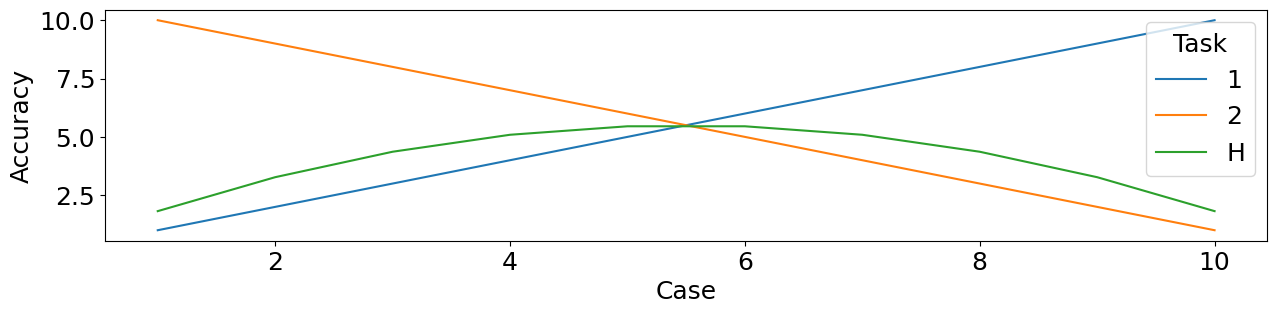

In [7]:
# draw Harmonic mean understanding
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

x = np.arange(10)+ 1
y1 = np.arange(10) + 1
y2 = 10 - np.arange(10)
H = 2/(1/y1+1/y2)

collected_data = []
collected_data.append(pd.DataFrame({
    'Case': x,
    'Accuracy': y1,
    'Task': 1,
}))
collected_data.append(pd.DataFrame({
    'Case': x,
    'Accuracy': y2,
    'Task': 2,
}))
collected_data.append(pd.DataFrame({
    'Case': x,
    'Accuracy': H,
    'Task': 'H',
}))

collected_data = pd.concat(collected_data, ignore_index=True)


plt.figure(figsize=(15, 3))
# sns.set_palette('Paired')
matplotlib.rcParams.update({'font.size': 18})

ax = sns.lineplot(x="Case", y="Accuracy", data=collected_data, hue='Task')
# plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
# ax = px.line(collected_data, x="Train size", y="Accuracy", hover_data=['Accuracy', 'Method'], color='Method')
# ax.show()

# plt.ylim([5, 6.5])

fig = ax.get_figure()
fig.savefig(os.path.join('D:', 'Downloads', 'fig.png'), dpi = 400, bbox_inches='tight')

# SCIFAR results

In [4]:
'''collect exps'''
project_name = 'SCIFAR100'
modes = ['continual']

'''scifar100 resnet18'''
# exps = [
#     *[f'HT-naive-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [True, False] for learning_rate in ['1e-05', '0_0001', '0_001', '0_01']],
#     *[f'HT-er-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [True, False] for learning_rate in ['1e-05', '0_0001', '0_001', '0_01']],
#     *[f'HT-gem-tsk_{return_task_id}-lr{learning_rate}-p256-m0_5'
#       for return_task_id in [True, False] for learning_rate in ['1e-05', '0_0001', '0_001', '0_01']],
#     *[f'HT-lwf-tsk_{return_task_id}-lr{learning_rate}-a1-t2'
#       for return_task_id in [True, False] for learning_rate in ['1e-05', '0_0001', '0_001', '0_01']],
#     ]
# exps_dis = [
#     *[f"naive {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False]
#       for learning_rate in ['1e-05', '1e-4', '1e-3', '1e-2']],
#     *[f"er {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False]
#       for learning_rate in ['1e-05', '1e-4', '1e-3', '1e-2']],
#     *[f"gem {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False]
#       for learning_rate in ['1e-05', '1e-4', '1e-3', '1e-2']],
#     *[f"lwf {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False]
#       for learning_rate in ['1e-05', '1e-4', '1e-3', '1e-2']],
# ]
# exps = [
#     *[f'HT-naive-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [True] for learning_rate in ['0_025', '0_05', '0_075', '0_1']],
#     *[f'HT-naive-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [False] for learning_rate in ['0_0003', '0_0007', '0_003', '0_007']],
#     *[f'HT-er-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [True, False] for learning_rate in ['0_0003', '0_0007', '0_003', '0_007']],
#     *[f'HT-gem-tsk_{return_task_id}-lr0_001-p256-m{m}'
#       for return_task_id in [True, False] for m in ['0_1', '0_3', '0_7', '1_0']],
#     *[f'HT-lwf-tsk_{return_task_id}-lr0_001-a{a}-t2'
#       for return_task_id in [True, False] for a in ['0_01', '0_1', '10', '100']],
#     ]
# exps_dis = [
#     *[f"naive {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True] for learning_rate in ['0.025', '0.05', '0.075', '0.1']],
#     *[f"naive {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [False] for learning_rate in ['3e-4', '7e-4', '3e-3', '7e-3']],
#     *[f"er {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False] for learning_rate in ['3e-4', '7e-4', '3e-3', '7e-3']],
#     *[f"gem {'Task' if return_task_id else 'Class'} lr1e-3 m{m}"
#       for return_task_id in [True, False] for m in ['0.1', '0.3', '0.7', '1.0']],
#     *[f"lwf {'Task' if return_task_id else 'Class'} lr0_001 a{a}"
#       for return_task_id in [True, False] for a in ['0.01', '0.1', '10', '100']],
# ]
# exps = [
#     *[f'HT-ewc-tsk_{return_task_id}-lr{learning_rate}-lambda1'
#       for return_task_id in [True, False] for learning_rate in ['0_0001', '0_001', '0_01', '0_1']],
#     ]
# exps_dis = [
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False] for learning_rate in ['0.0001', '0.001', '0.01', '0.1']],
# ]
# exps = [
#     *[f'HT-ewc-tsk_{return_task_id}-lr0_01-lambda{ewc_lambda}'
#       for return_task_id in [True] for ewc_lambda in ['0_01', '0_1', '10', '100']],
#     *[f'HT-ewc-tsk_{return_task_id}-lr0_001-lambda{ewc_lambda}'
#       for return_task_id in [False] for ewc_lambda in ['0_01', '0_1', '10', '100']],
#     ]
# exps_dis = [
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr0_01 lambda {ewc_lambda}"
#       for return_task_id in [True] for ewc_lambda in ['0.01', '0.1', '10', '100']],
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr0_001 lambda {ewc_lambda}"
#       for return_task_id in [False] for ewc_lambda in ['0.01', '0.1', '10', '100']],
# ]
# exps = [
#     *[f'HT-MT-naive-tsk_{return_task_id}-lr{learning_rate}'
#       for return_task_id in [True, False] for learning_rate in ['0_0001', '0_001', '0_01', '0_1']],
#     ]
# exps_dis = [
#     *[f"MT {'Task' if return_task_id else 'Class'} lr{learning_rate}"
#       for return_task_id in [True, False] for learning_rate in ['0.0001', '0.001', '0.01', '0.1']],
# ]
# exps = [
#     *[f'HT-lwf-tsk_{return_task_id}-lr0_001-a1-t{t}'
#       for return_task_id in [True, False] for t in ['0_1', '1', '10', '100']],
#     ]
# exps_dis = [
#     *[f"lwf {'Task' if return_task_id else 'Class'} lr0_001 a1 t{t}"
#       for return_task_id in [True, False] for t in ['0.1', '1', '10', '100']],
# ]
# exps = [
#     *[f'HT-ewc-tsk_{return_task_id}-lr0_001-lambda{ewc_lambda}'
#       for return_task_id in [False]
#       for ewc_lambda in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(-1, 1, num=24), decimals=2).tolist()
#       ]],
#     ]
# exps_dis = [
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr0_001 lambda {ewc_lambda}"
#       for return_task_id in [False] for ewc_lambda in np.around(np.logspace(-1, 1, num=24), decimals=2).tolist()],
# ]
# exps = [
#     *[f'HT-lwf-tsk_{return_task_id}-lr0_001-a1-t{t}'
#       for return_task_id in [False]
#       for t in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(0, 1, num=24), decimals=2).tolist()
#       ]],
#     ]
# exps_dis = [
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr0_001 a1 t{t}"
#       for return_task_id in [False] for t in np.around(np.logspace(0, 1, num=24), decimals=2).tolist()],
# ]
# exps = [
#     *[f'HT-ewc-tsk_{return_task_id}-lr{lr}-lambda{t}'
#       for return_task_id in [False]
#       for t in ['0_22', '1']
#       for lr in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(-4, -2, num=24), decimals=5).tolist()
#       ]],
#     ]
# exps_dis = [
#     *[f"ewc {'Task' if return_task_id else 'Class'} lr{lr} lambda{t}"
#       for return_task_id in [False]
#       for t in [0.22, 1]
#       for lr in np.around(np.logspace(-4, -2, num=24), decimals=5).tolist()],
# ]
# exps = [
#     *[f'HT-lwf-tsk_{return_task_id}-lr{lr}-a{a}-t{t}'
#       for return_task_id in [False]
#       for t in ['3_32']
#       for a in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(-2, 1, num=8), decimals=3).tolist()
#       ]
#       for lr in [
#           (lambda x: str(x).replace('.', '_')) (x)
#           for x in np.around(np.logspace(-4, -2, num=8), decimals=5).tolist()
#       ]],
#     ]
# exps_dis = [
#     *[f"lwf {'Task' if return_task_id else 'Class'} lr{lr} a{a} t{t}"
#       for return_task_id in [False]
#       for t in [3.32]
#       for a in np.around(np.logspace(-2, 1, num=8), decimals=3).tolist()
#       for lr in np.around(np.logspace(-4, -2, num=8), decimals=5).tolist()],
# ]

# show overall results
exps = [
    *[f'HT-MT-naive-tsk_{return_task_id}-lr0_001-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f'HT-naive-tsk_{return_task_id}-lr{"0_01" if return_task_id else "0_003"}-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f'HT-er-tsk_{return_task_id}-lr0_0007-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f'HT-gem-tsk_{return_task_id}-lr0_001-p256-m{"0_7" if return_task_id else "0_1"}-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f'HT-lwf-tsk_{return_task_id}-lr0_001-a1-t{"2" if return_task_id else "3_32"}-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f'HT-ewc-tsk_{return_task_id}-{"lr0_01-lambda1" if return_task_id else "lr0_001-lambda0_22"}-seed{seed}'
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    ]
exps_dis = [
    *[f"MultiTask{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f"Finetune{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f"ER{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f"GEM{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f"LwF{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
    *[f"EWC{'*' if return_task_id else ''}"
      for return_task_id in [False, True] for seed in [1, 2, 3, 4, 5, 6, 7, 8]],
]



collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for mode in modes:
        print(mode)
        accs = get_accs(exp_name, mode, project_name=project_name, index='-9' if 'MT' not in exp_name else '')
        # print(accs)
        collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

HT-MT-naive-tsk_False-lr0_001-seed1
continual
HT-MT-naive-tsk_False-lr0_001-seed2
continual
HT-MT-naive-tsk_False-lr0_001-seed3
continual
HT-MT-naive-tsk_False-lr0_001-seed4
continual
HT-MT-naive-tsk_False-lr0_001-seed5
continual
HT-MT-naive-tsk_False-lr0_001-seed6
continual
HT-MT-naive-tsk_False-lr0_001-seed7
continual
HT-MT-naive-tsk_False-lr0_001-seed8
continual
HT-MT-naive-tsk_True-lr0_001-seed1
continual
HT-MT-naive-tsk_True-lr0_001-seed2
continual
HT-MT-naive-tsk_True-lr0_001-seed3
continual
HT-MT-naive-tsk_True-lr0_001-seed4
continual
HT-MT-naive-tsk_True-lr0_001-seed5
continual
HT-MT-naive-tsk_True-lr0_001-seed6
continual
HT-MT-naive-tsk_True-lr0_001-seed7
continual
HT-MT-naive-tsk_True-lr0_001-seed8
continual
HT-naive-tsk_False-lr0_003-seed1
continual
HT-naive-tsk_False-lr0_003-seed2
continual
HT-naive-tsk_False-lr0_003-seed3
continual
HT-naive-tsk_False-lr0_003-seed4
continual
HT-naive-tsk_False-lr0_003-seed5
continual
HT-naive-tsk_False-lr0_003-seed6
continual
HT-naive-tsk_F

In [5]:

'''cal mean and ci95, then formulate table str-cell and to latex.'''
# exp = 'Finetune'
# mode = 'continual'
# acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
data = []
for exp in sorted(set(exps_dis)):
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))
data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', columns='Phase', values='str')
data = data[modes]
data = data.reindex(sorted(set(exps_dis)))
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{ll}
{Phase} & {continual} \\
{Method} & {} \\
ER & 12.86 $\pm$ 0.13 \\
ER* & 61.23 $\pm$ 0.54 \\
EWC & 7.41 $\pm$ 0.35 \\
EWC* & 46.12 $\pm$ 1.23 \\
Finetune & 7.37 $\pm$ 0.27 \\
Finetune* & 46.77 $\pm$ 1.29 \\
GEM & 13.43 $\pm$ 0.21 \\
GEM* & 60.14 $\pm$ 0.41 \\
LwF & 8.07 $\pm$ 0.26 \\
LwF* & 70.41 $\pm$ 0.74 \\
MultiTask & 53.42 $\pm$ 0.30 \\
MultiTask* & 79.87 $\pm$ 0.25 \\
\end{tabular}



Phase,continual
Method,
ER,12.86 +- 0.13
ER*,61.23 +- 0.54
EWC,7.41 +- 0.35
EWC*,46.12 +- 1.23
Finetune,7.37 +- 0.27
Finetune*,46.77 +- 1.29
GEM,13.43 +- 0.21
GEM*,60.14 +- 0.41
LwF,8.07 +- 0.26


# CPIN

In [13]:

# Finetune & 9.22 & 48.97 $\pm$ 0.88 & 42.06 $\pm$ 0.91 & 52.33 $\pm$ 0.96 & 15.56 $\pm$ 0.43 \\
# ER & 28.82 & 59.16 $\pm$ 0.89 & 45.94 $\pm$ 1.05 & 60.11 $\pm$ 1.01 & 14.55 $\pm$ 0.42 \\
# GEM & 9.19 & 51.13 $\pm$ 1.08 & 46.14 $\pm$ 1.04 & 55.16 $\pm$ 1.05 & 13.23 $\pm$ 0.38 \\
# LwF & 9.21 & \textbf{64.45 $\pm$ 0.65} & \textbf{57.87 $\pm$ 0.67} & \textbf{65.73 $\pm$ 0.74} & 17.97 $\pm$ 0.51 \\
# EWC & 9.37 & 53.92 $\pm$ 0.75 & 50.36 $\pm$ 0.73 & 56.64 $\pm$ 0.83 & 17.11 $\pm$ 0.46 \\
# RPSnet & \textbf{45.88} & 55.33 $\pm$ 0.81 & 48.21 $\pm$ 0.63 & 58.21 $\pm$ 0.95 & \textbf{26.32 $\pm$ 0.33} \\
# \midrule
# Finetune* & 75.37 & 61.57 $\pm$ 0.68 & \textbf{58.47 $\pm$ 0.66} & \textbf{64.30 $\pm$ 0.77} & \textbf{18.32 $\pm$ 0.45} \\
# ER* & \textbf{86.46} & \textbf{62.22 $\pm$ 0.85} & 50.20 $\pm$ 0.94 & 63.23 $\pm$ 0.96 & 15.74 $\pm$ 0.42 \\
# GEM* & 19.68 & 57.26 $\pm$ 0.71 & 49.65 $\pm$ 0.71 & 58.33 $\pm$ 0.75 & 16.30 $\pm$ 0.43 \\
# LwF* & 73.24 & 59.99 $\pm$ 0.72 & 51.05 $\pm$ 0.75 & 60.44 $\pm$ 0.84 & 16.21 $\pm$ 0.42 \\
# EWC* & 76.15 & 57.83 $\pm$ 0.65 & 53.11 $\pm$ 0.69 & 59.00 $\pm$ 0.77 & 18.01 $\pm$ 0.53 \\

'''calculate Hn'''

sys = 57.83
pro = 53.11
non = 59.00
noc = 18.01
Hn = 2/(1/sys + 1/pro)
Hr = 2/(1/non + 1/noc)
Ha = 4/(1/sys + 1/pro + 1/non + 1/noc)
print (f'{Hn:.2f} &  & {Hr:.2f} & {Ha:.2f}')

55.37 &  & 27.60 & 36.83
